# **SUBMISSION PROYEK AKHIR**
## **KELAS BELAJAR MACHINE LEARNING UNTUK PEMULA**
### KLASIFIKASI GAMBAR ROCKPAPERSCISSORS

Nama : Addina Dwi Nugroho

Email : addin27nugroho@gmail.com

In [16]:
#import tensorflow dan pastikan versinya di atas 2
import tensorflow as tf
print(tf.__version__)

2.5.0


In [17]:
#siapkan dataset rockpaperscissor
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-07 08:08:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.09MB/s    in 93s     

2021-07-07 08:10:14 (3.32 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [18]:
#ekstrak dataset yang masih berformat zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [19]:
#definisikan direktori dataset
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
print(os.listdir(base_dir)) #cek list direktori dataset


['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']


In [20]:
#buat image data generator untuk augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  fill_mode='nearest',
                  validation_split=0.4) #menggunakan validation set sebanyak 40% (0.4) sesuai kriteria submisson

In [21]:
#buat data latih dari proses augmentasi gambar sebelumnya
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150), #ubah resolusi gambar menjadi 100x150 pixel
        class_mode='categorical', #gunakan class_mode 'categorical' untuk permasalahan multi class classificaton
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150), 
        class_mode='categorical', 
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [22]:
#latih data dengan model sequential sesuai kriteria submission
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #gunakan fungsi aktivasi 'softmax' untuk permasalahan multi class classification
    ])

In [23]:
#compile model menggunakan optimizer dan loss-function yang tidak diajarkan di kelas (sesuai saran dicoding)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy']) 

In [24]:
#Gunakan Callback agar proses otomatis berhenti ketika akurasi model memenuhi kriteria (96%)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.96):
      print("\nAKURASI MODEL LEBIH DARI 96%! PELATIHAN MODEL DIHENTIKAN.")
      self.model.stop_training = True

callbacks = myCallback()

In [25]:
# latih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=25,  #jumlah batch yang dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  #jumlah batch yang dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callbacks])

Epoch 1/20
25/25 - 18s - loss: 1.1794 - accuracy: 0.4052 - val_loss: 0.9615 - val_accuracy: 0.3562
Epoch 2/20
25/25 - 17s - loss: 0.8170 - accuracy: 0.6388 - val_loss: 0.4966 - val_accuracy: 0.8375
Epoch 3/20
25/25 - 17s - loss: 0.5409 - accuracy: 0.7857 - val_loss: 0.3164 - val_accuracy: 0.8875
Epoch 4/20
25/25 - 17s - loss: 0.3934 - accuracy: 0.8637 - val_loss: 0.4783 - val_accuracy: 0.8000
Epoch 5/20
25/25 - 17s - loss: 0.3231 - accuracy: 0.8844 - val_loss: 0.3365 - val_accuracy: 0.8813
Epoch 6/20
25/25 - 17s - loss: 0.2425 - accuracy: 0.9221 - val_loss: 0.2124 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 18s - loss: 0.2366 - accuracy: 0.9052 - val_loss: 0.1934 - val_accuracy: 0.9375
Epoch 8/20
25/25 - 17s - loss: 0.3011 - accuracy: 0.9390 - val_loss: 0.1778 - val_accuracy: 0.9438
Epoch 9/20
25/25 - 17s - loss: 0.1860 - accuracy: 0.9413 - val_loss: 0.1440 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 17s - loss: 0.1808 - accuracy: 0.9388 - val_loss: 0.2080 - val_accuracy: 0.9312
Epoch 11/

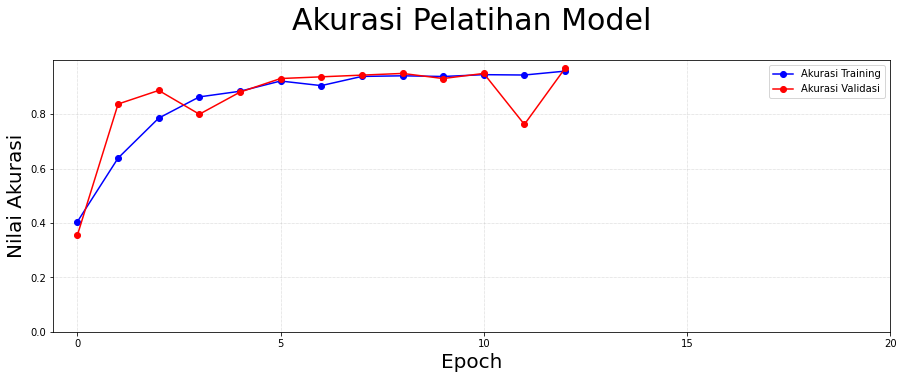

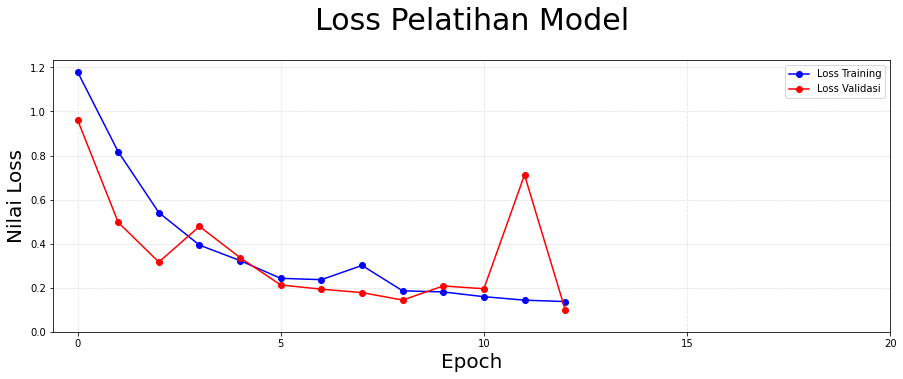

In [26]:
#visualisasi hasil pelatihan model
import matplotlib.pyplot as plt #import library untuk visualisasi data

train_acc = history.history['accuracy'] #akurasi training
val_acc = history.history['val_accuracy'] #akurasi validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(train_acc)) #jumlah epoch

plt.figure(figsize=(15,5))
plt.plot(epochs, train_acc, marker='o', color='blue', label='Akurasi Training')
plt.plot(epochs, val_acc, marker='o', color='red', label='Akurasi Validasi')
plt.legend()
plt.title('Akurasi Pelatihan Model', pad=30, fontsize=30)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Nilai Akurasi', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.xticks([0,5,10,15,20])
plt.ylim(ymin=0)
plt.show()

plt.figure(figsize=(15,5))
plt.plot(epochs, train_loss, marker='o', color='blue', label='Loss Training')
plt.plot(epochs, val_loss, marker='o', color='red', label='Loss Validasi')
plt.legend()
plt.title('Loss Pelatihan Model', pad=30, fontsize=30)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Nilai Loss', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.xticks([0,5,10,15,20])
plt.ylim(ymin=0)
plt.show()

Saving coba gunting.jpg to coba gunting (3).jpg
coba gunting.jpg
model prediction = scissors


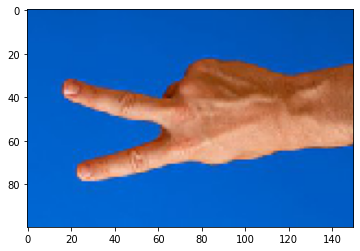

In [27]:
#ujicoba model
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  #emprediksi gambar
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('model prediction = paper')
  elif classes[0][1]==1:
    print('model prediction = rock')
  elif classes[0][2]==1:
    print('model prediction = scissors')
  else:
    print('unknown')